### Datasets didapatkan dari kishanyadav/inshort-news
### menggunakan file inshort_news_data-1.csv

In [228]:
!pip install -q kaggle
!kaggle datasets download -d kishanyadav/inshort-news

inshort-news.zip: Skipping, found more recently modified local copy (use --force to force download)


In [206]:
import pandas as pd

datasets = pd.read_csv('inshort_news_data-1.csv')
datasets = datasets.drop(columns=['Unnamed: 0','news_headline'])
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_article   4817 non-null   object
 1   news_category  4817 non-null   object
dtypes: object(2)
memory usage: 75.4+ KB


In [208]:
category = pd.get_dummies(datasets.news_category)
df_baru = pd.concat([datasets, category], axis=1)
df_baru = df_baru.drop(columns='news_category')
df_baru.tail()

,news_article,automobile,entertainment,politics,science,sports,technology,world
4812,"AstraZeneca, which is developing a coronavirus...",0,0,0,1,0,0,0
4813,As many as two billion people will face 60°C t...,0,0,0,1,0,0,0
4814,Scientists have said that the weight of human-...,0,0,0,1,0,0,0
4815,The IUCN released an update of its Red List of...,0,0,0,1,0,0,0
4816,Environment Minister Prakash Javadekar has sai...,0,0,0,1,0,0,0


In [209]:
article = df_baru['news_article'].values

label = df_baru[['automobile','entertainment','politics','science','sports','technology','world']].values



In [211]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(article, label, test_size=0.2)

In [216]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(data_train) 
tokenizer.fit_on_texts(data_test)
 
sequens_train = tokenizer.texts_to_sequences(data_train)
sequens_test = tokenizer.texts_to_sequences(data_test)
 
padded_train = pad_sequences(sequens_train,maxlen=50) 
padded_test = pad_sequences(sequens_test,maxlen=50)

print("Banyak sample pada data train:", len(padded_train))
print("Banyak sample pada data test:",len(padded_test))

Banyak sample pada data train: 3853
Banyak sample pada data test: 964


In [217]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [218]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("\nAkurasi dan validasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [219]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2,
                    callbacks=[callbacks])

Epoch 1/30
121/121 - 6s - loss: 1.8163 - accuracy: 0.2281 - val_loss: 1.4825 - val_accuracy: 0.4388
Epoch 2/30
121/121 - 3s - loss: 1.1533 - accuracy: 0.5419 - val_loss: 0.9307 - val_accuracy: 0.5996
Epoch 3/30
121/121 - 3s - loss: 0.7534 - accuracy: 0.6976 - val_loss: 0.6996 - val_accuracy: 0.7147
Epoch 4/30
121/121 - 3s - loss: 0.5529 - accuracy: 0.7963 - val_loss: 0.6011 - val_accuracy: 0.8102
Epoch 5/30
121/121 - 3s - loss: 0.4048 - accuracy: 0.8700 - val_loss: 0.4741 - val_accuracy: 0.8797
Epoch 6/30
121/121 - 3s - loss: 0.3196 - accuracy: 0.9060 - val_loss: 0.4682 - val_accuracy: 0.8817
Epoch 7/30
121/121 - 3s - loss: 0.2522 - accuracy: 0.9336 - val_loss: 0.4367 - val_accuracy: 0.9046
Epoch 8/30
121/121 - 3s - loss: 0.2237 - accuracy: 0.9400 - val_loss: 0.4054 - val_accuracy: 0.9139
Epoch 9/30
121/121 - 3s - loss: 0.2050 - accuracy: 0.9455 - val_loss: 0.3922 - val_accuracy: 0.9191
Epoch 10/30
121/121 - 3s - loss: 0.1707 - accuracy: 0.9546 - val_loss: 0.3809 - val_accuracy: 0.9243

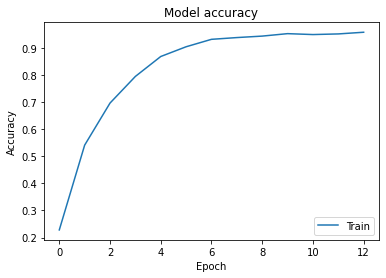

In [220]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

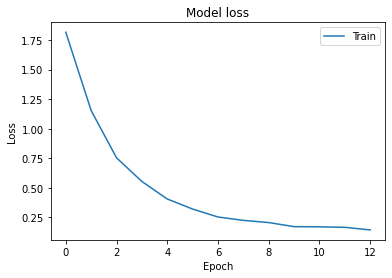

In [221]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()